# ABOUT THE COMPANY

**Yulu** is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

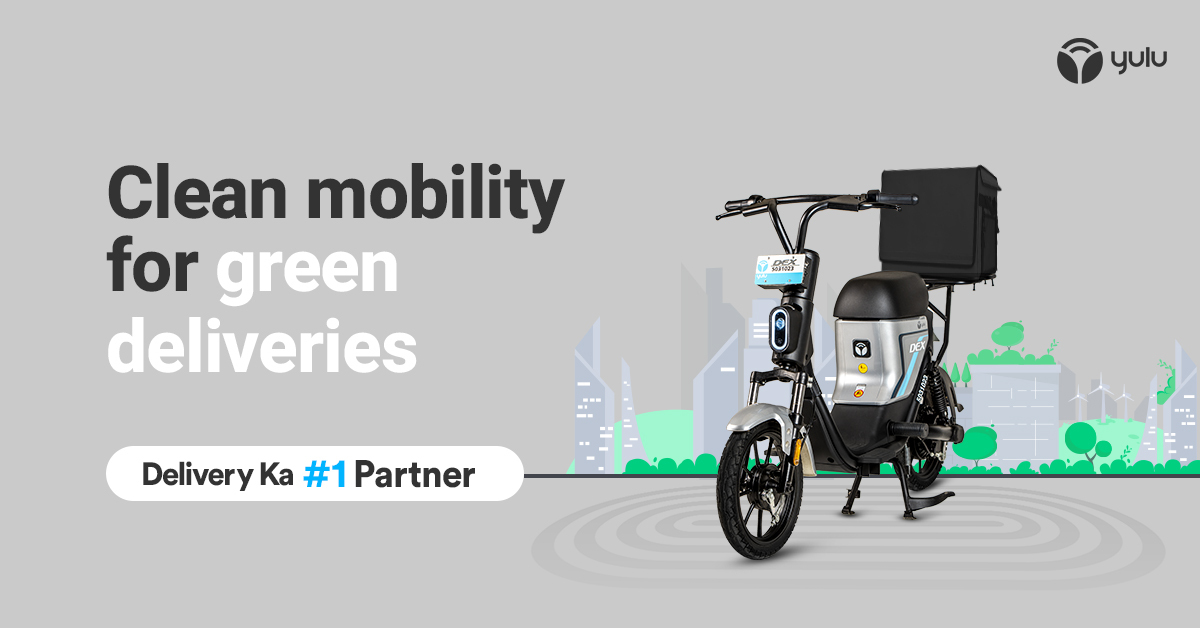

# PROBLEM STATEMENT

The company wants to know:  

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*How well those variables describe the electric cycle demands

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind,chi2_contingency, spearmanr, pearsonr, norm,shapiro,poisson,expon,kruskal
from statsmodels.stats.weightstats import ztest

# IMPORT DATASET

In [3]:
df=pd.read_csv("YULU.csv")

In [4]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

**Column Profiling:**

**datetime**: datetime  
**season**: season (1: spring, 2: summer, 3: fall, 4: winter)  
**holiday**: whether day is a holiday or not  
**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.  
**weather**:  
1: Clear, Few clouds, partly cloudy, partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**temp**: temperature in Celsius  
**atemp**: feeling temperature in Celsius  
**humidity**: humidity  
**windspeed**: wind speed  
**casual**: count of casual users  
**registered**: count of registered users  
**count**: count of total rental bikes including both casual and registered  

# EXPLORATORY DATA ANALYSIS

### SHAPE OF THE DATASET

In [5]:
df.shape

(10886, 12)

* There are 10886 records and 12 columns available in the dataset

### PRESENCE OF NULL VALUES

In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* There are no null values present in the dataset

### INFO ON DATA TYPES OF EACH COLUMNS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* datetime column to be converted to **datetime** datatype
* season,holiday,workingday,weather columns to be converted to **object** datatype

### DATA TYPE CONVERSIONS

In [8]:
# DATA TYPE CONVERSION TO datetime
df['datetime']=pd.to_datetime(df['datetime'])

# DATA TYPE CONVERSION TO object
df[['season','holiday','workingday','weather']]=df[['season','holiday','workingday','weather']].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


### COUNT OF UNIQUE VALUES OF EACH COLUMNS AND CORRESPONDING DATA TYPE

In [10]:
# VIEW COUNT OF UNIQUE VALUES IN EACH COLUMN AND ITS CORRESPONDING DATA TYPE
a=[]
col=[]
type_=[]
for i in df.columns:
    a.append(df[i].nunique())
    col.append(i)
    type_.append(df[i].dtype)
pd.DataFrame({'Columns':col,'Count of Unique Values':a,'data type':type_})

Columns  Count of Unique Values       data type
0     datetime                   10886  datetime64[ns]
1       season                       4          object
2      holiday                       2          object
3   workingday                       2          object
4      weather                       4          object
5         temp                      49         float64
6        atemp                      60         float64
7     humidity                      89           int64
8    windspeed                      28         float64
9       casual                     309           int64
10  registered                     731           int64
11       count                     822           int64

In [11]:
# GET THE UNIQUE VALUES IN SELECTED COLUMNS
cols=['season','holiday','workingday','weather']
for i in cols:
    print('*'*50)
    print(df[i].unique())
    print('*'*50)

**************************************************
[1 2 3 4]
**************************************************
**************************************************
[0 1]
**************************************************
**************************************************
[0 1]
**************************************************
**************************************************
[1 2 3 4]
**************************************************


In [12]:
df.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

* Mean & median are similar in temp, atemp & humidity are similar. Therefore there is less chances of outliers being present
* Though the mean & median are similar in windspeed, Q3 + 1.5 * ( Inter quartile range ) is less than the maximum value indicating the presence of outliers.
* Difference in mean & median in casual, registered & count columns indicating presence of outliers
* All these points can be verified through box plots

In [13]:
# GET THE CATEGORICAL & NUMERICAL COLUMNS SEPARATE FOR THE ANALYSIS
obj_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include=['int64','float64']).columns

## UNIVARIATE ANALYSIS

### COUNT OF TOTAL USERS TILL DATE

In [103]:
df['count'].sum()

2085476

* 2085476 users used rental bikes in the period of 2011-2012

### CASUAL VS REGISTERED USERS

In [105]:
df1=df[['casual','registered']].sum().reset_index()
df1.columns=['category','values']
df1['percentage']=df1['values']*100/(df['count'].sum())
df1

category   values  percentage
0      casual   392135   18.803141
1  registered  1693341   81.196859

* 81% of the users are registered and 18% are casual users

In [126]:
df['year']=df['datetime'].dt.year # Created a column extracting year from datetime column
df['month']=df['datetime'].dt.month # Created a column extracting month from datetime column
df['hours']=df['datetime'].dt.hour # Created a column extracting hour from datetime column
df.groupby('year')['casual'].sum()

year
2011    155817
2012    236318
Name: casual, dtype: int64

In [124]:
df.groupby('year')['registered'].sum()

year
2011     626162
2012    1067179
Name: registered, dtype: int64

* 50% increase in casual users and 70% increase in registered users are noticed from 2011 to 2012

### OUTLIER DETECTION

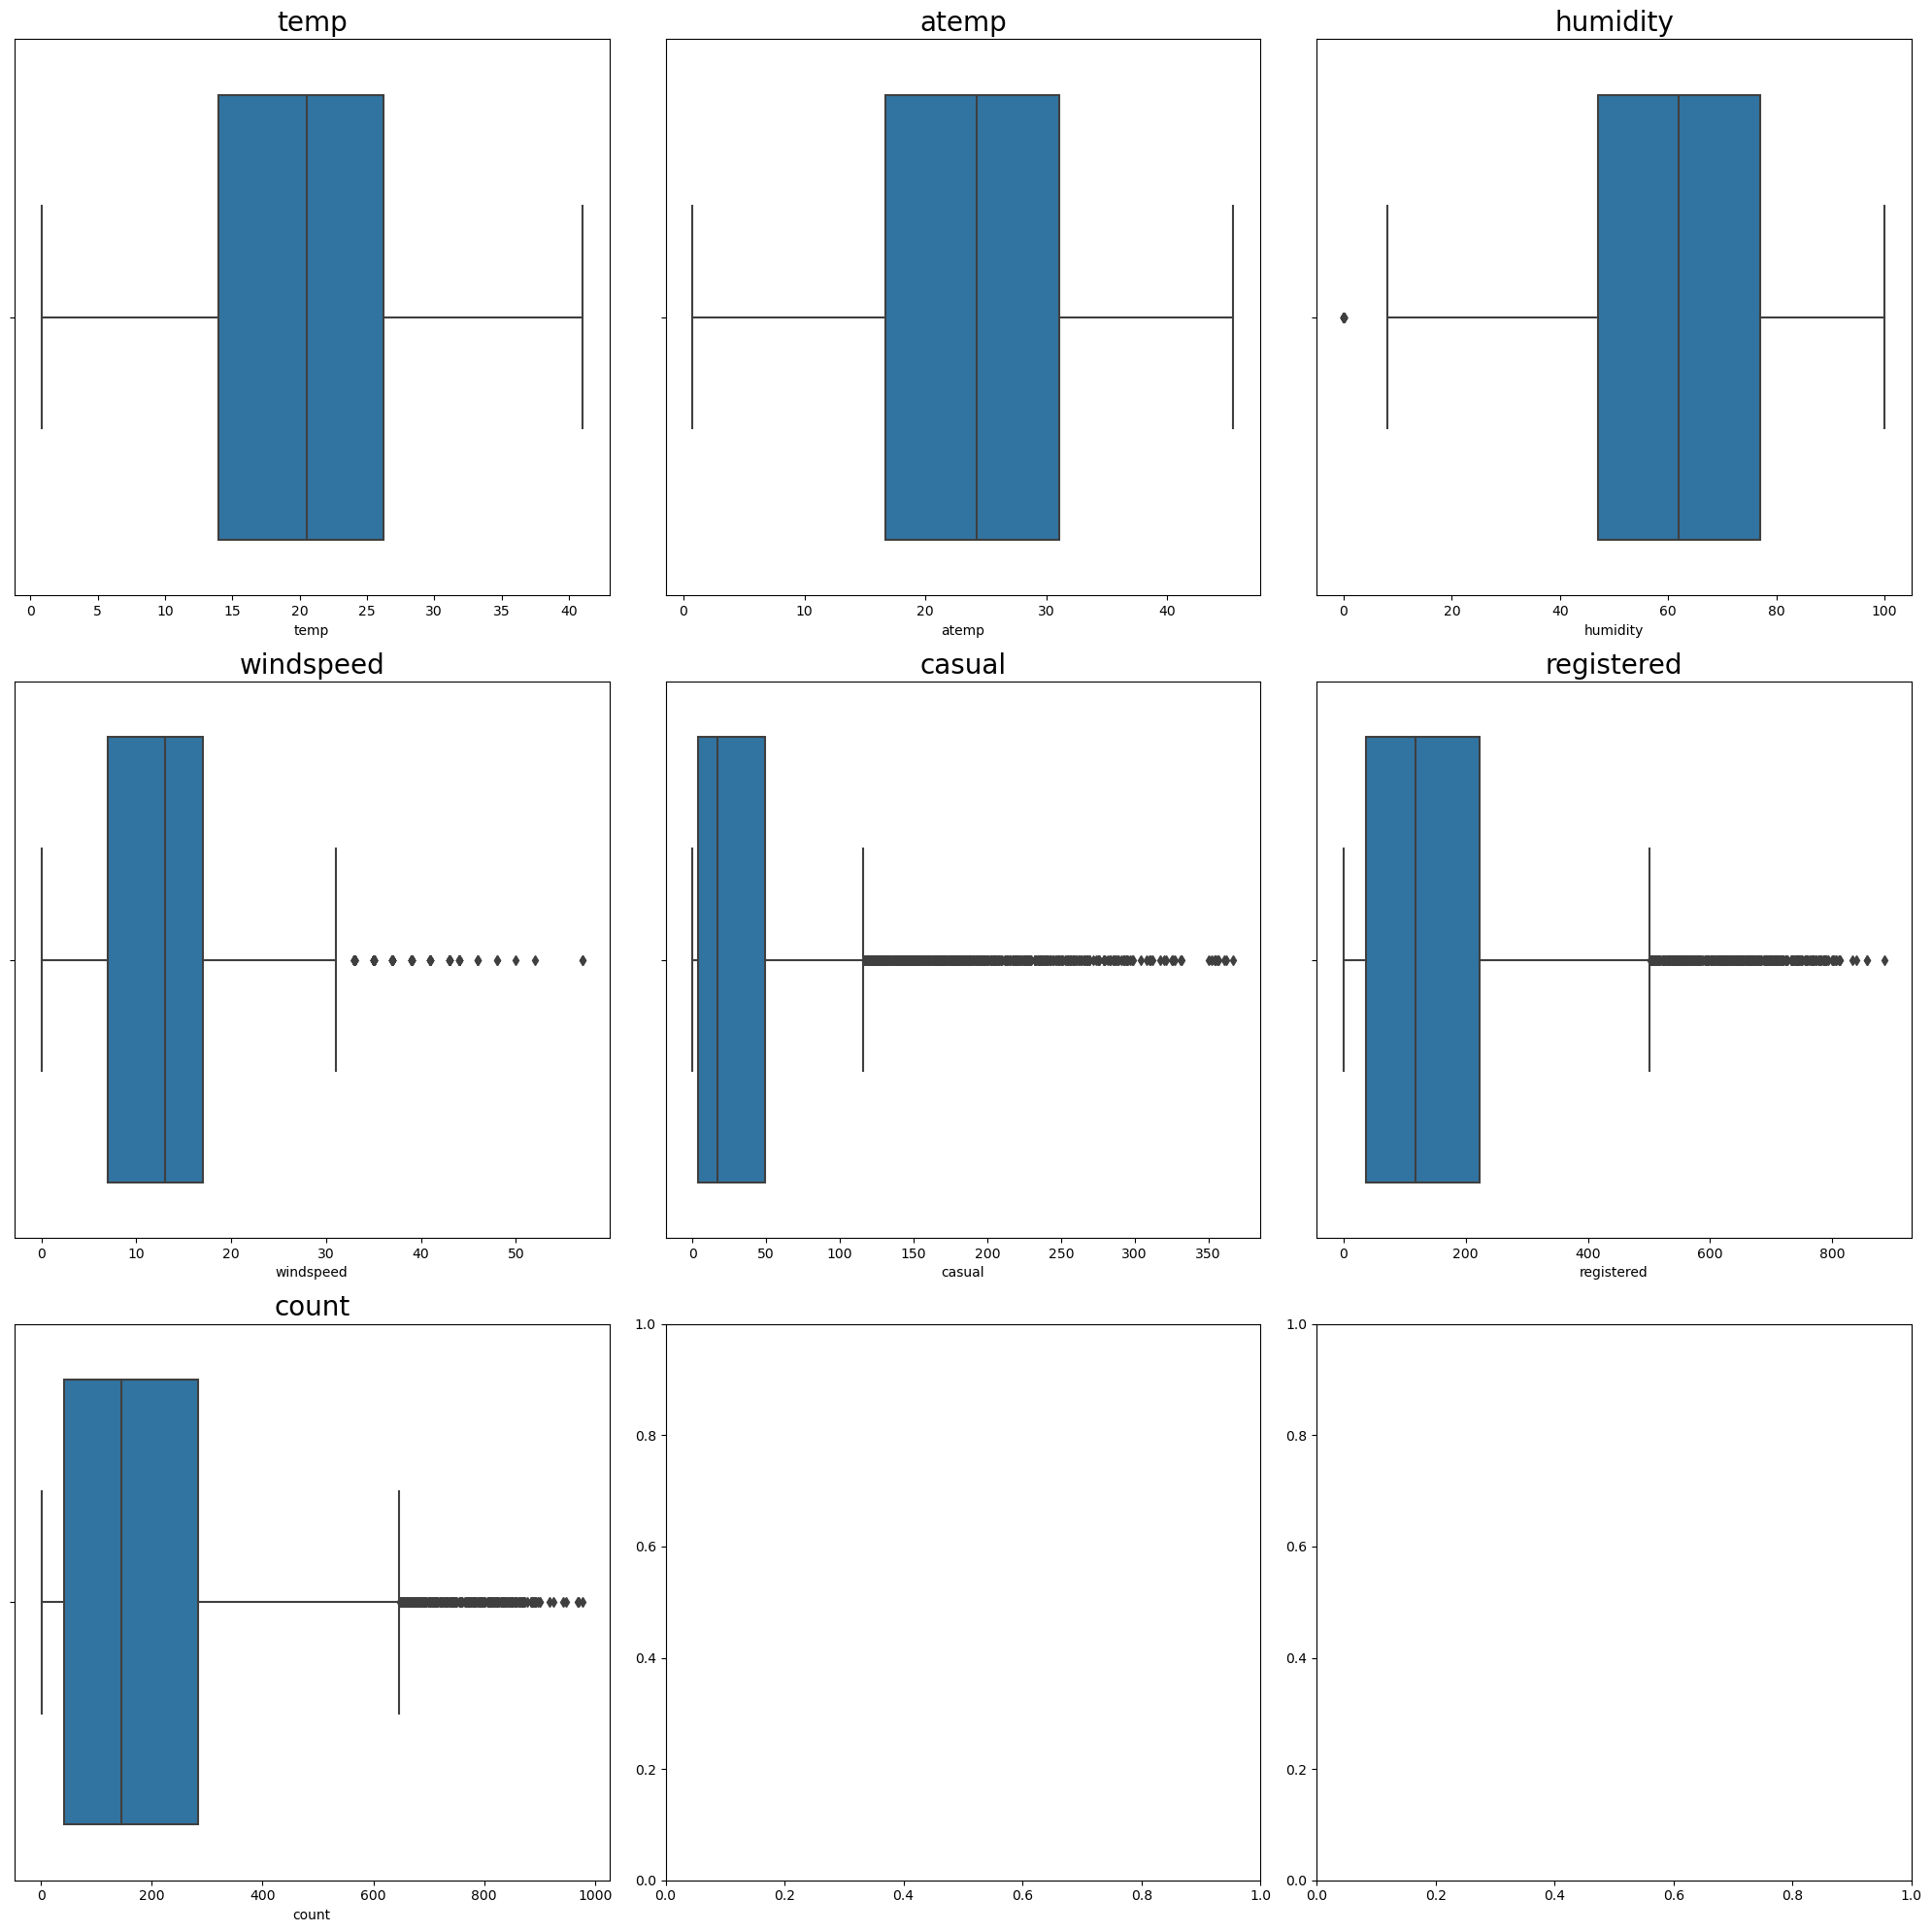

In [14]:
# BOX PLOT TO DETECT THE OUTLIERS
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for i,col_names in enumerate(num_cols):
    row=i//3
    col=i%3
    try:
        ax=axes[row][col]
        sns.boxplot(data=df,x=col_names,ax=ax)
        ax.set_title(col_names,fontsize=20)
    except:
        continue
plt.tight_layout()
plt
plt.show()

* Same inference on outliers is obtained from the box plots

### DISTRIBUTION OF NUMERICAL COLUMNS

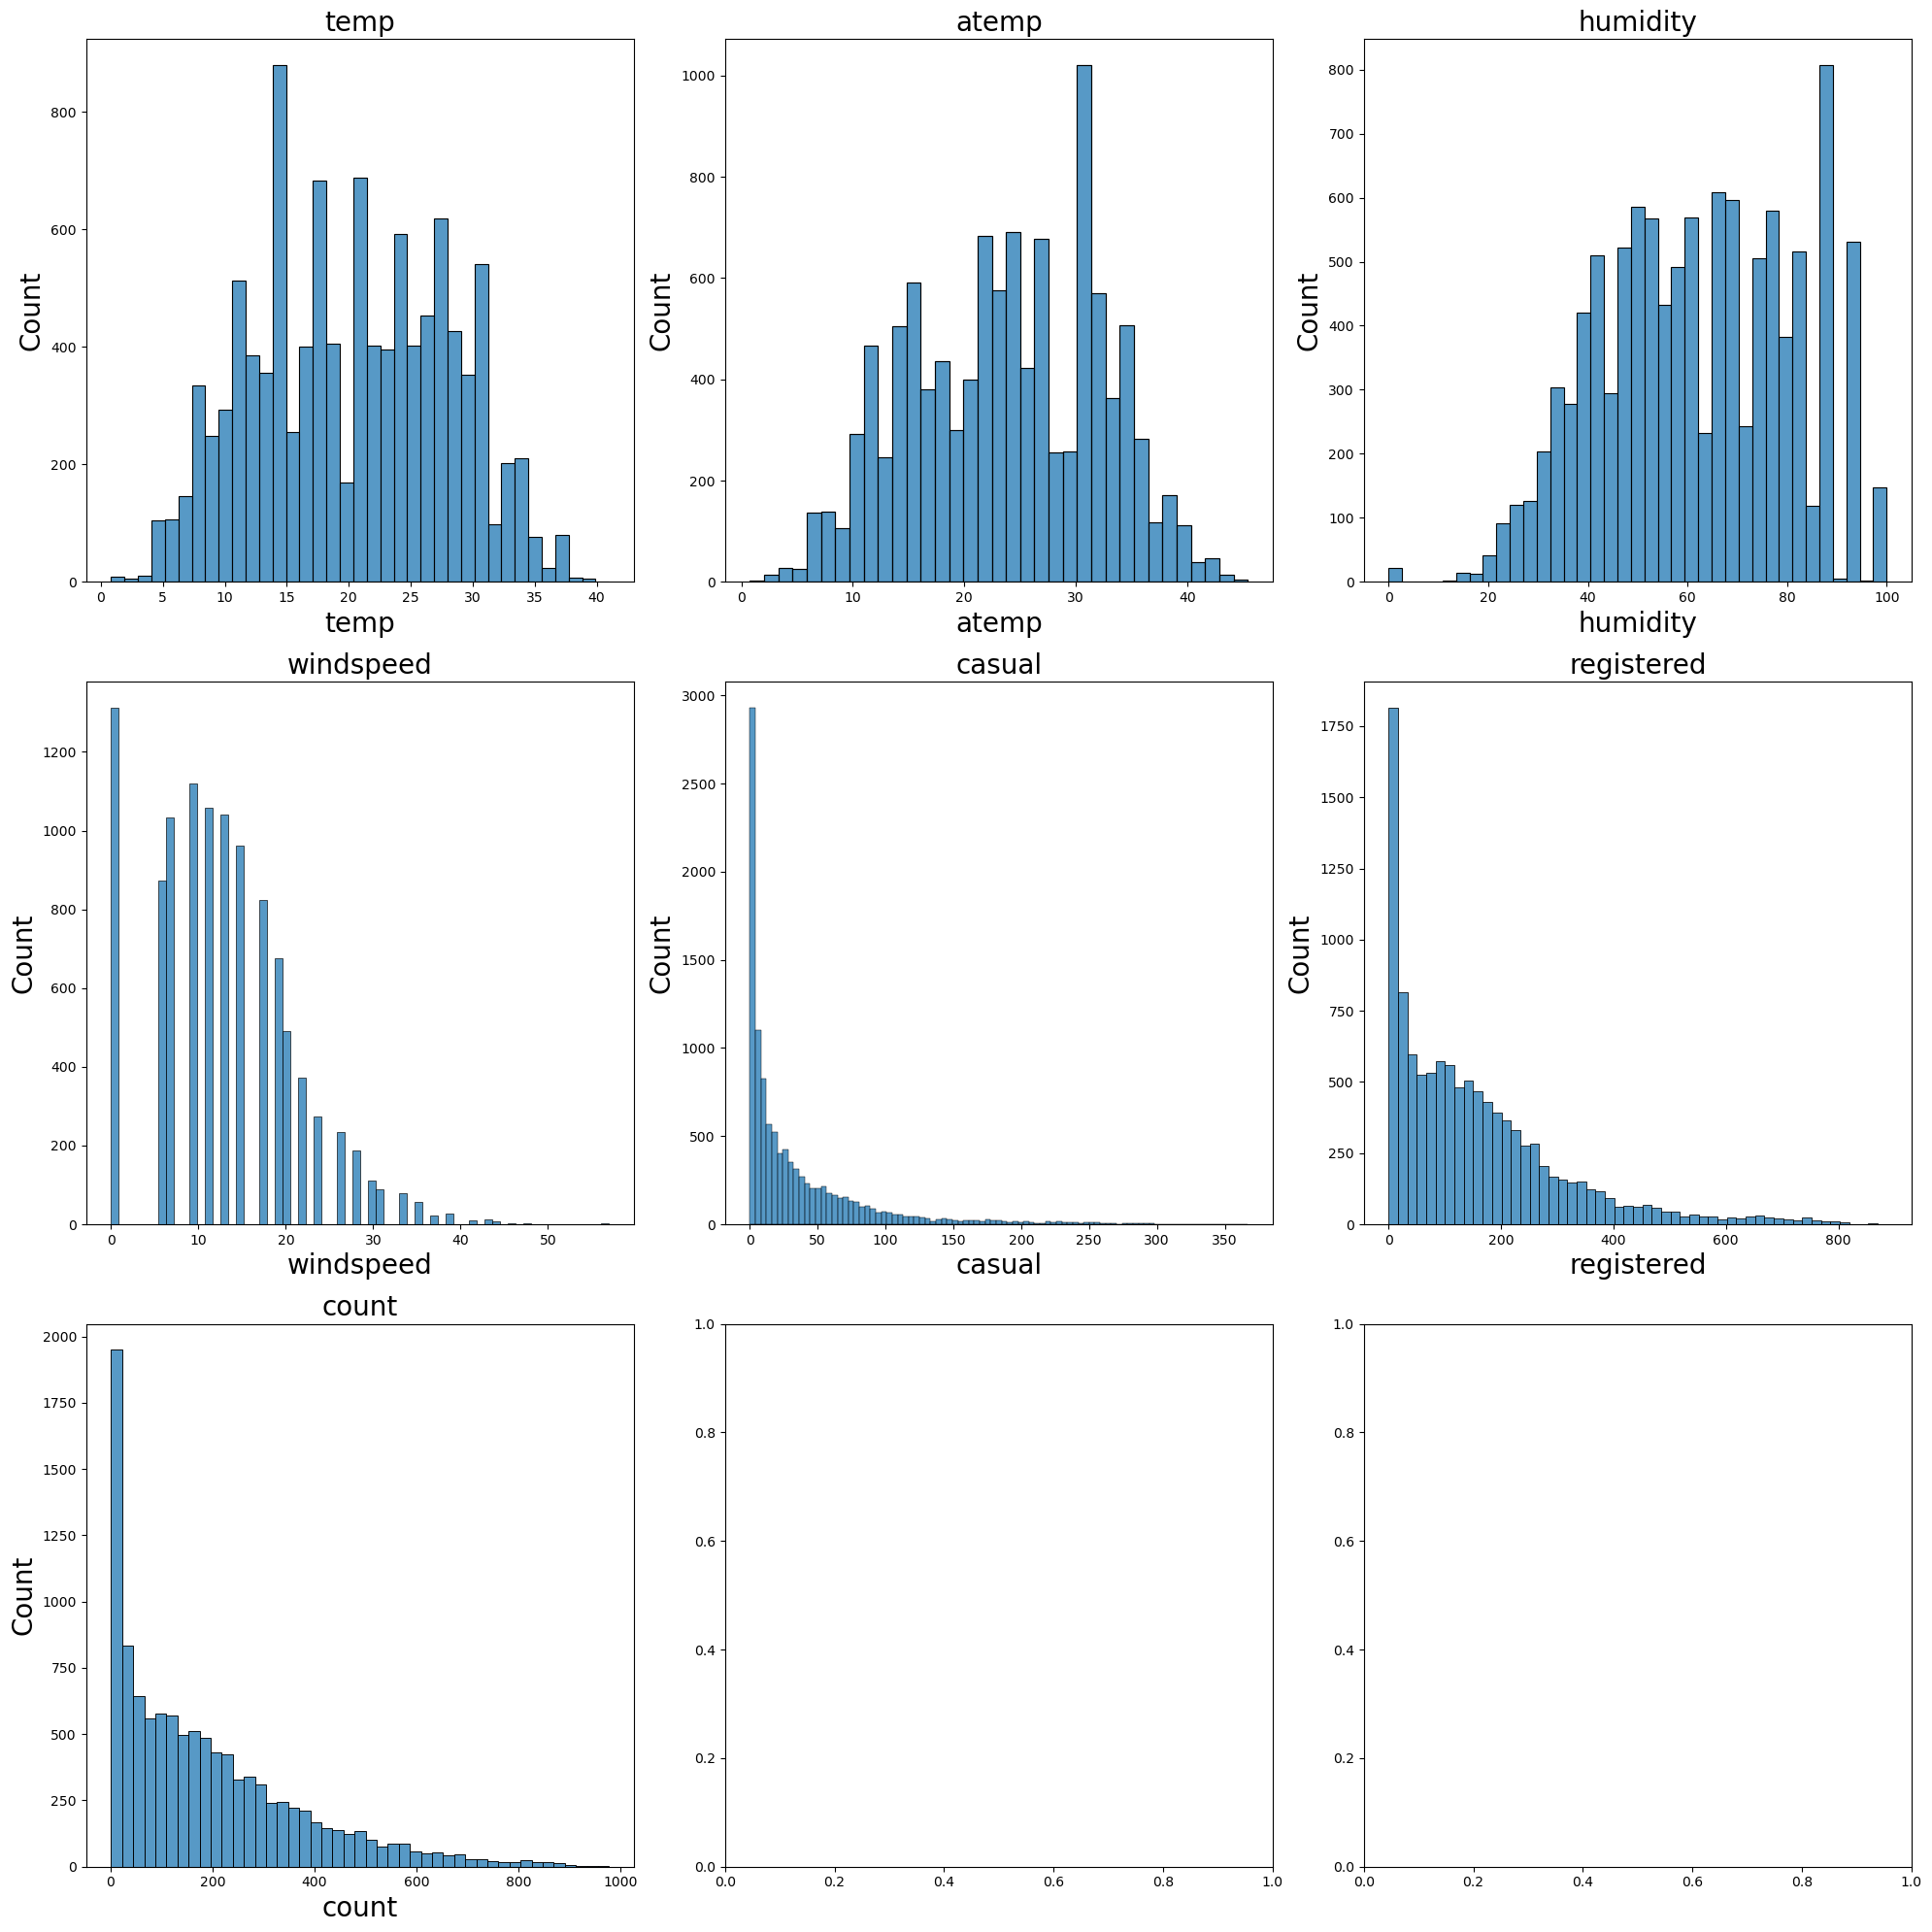

In [135]:
# HIST PLOT TO CHECK THE DISTRIBUTION
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for i,col_names in enumerate(num_cols):
    row=i//3
    col=i%3
    try:
        ax=axes[row][col]
        sns.histplot(data=df,x=col_names,ax=ax)
        ax.set_title(col_names,fontsize=20)
        ax.set_xlabel(col_names,fontsize=20)
        ax.set_ylabel('Count',fontsize=20)
    except:
        continue
plt.tight_layout()
plt.show()

* Most of the days, temperature is in the range of 20 degrees and feels like around 20 - 25 degree celsius
* The humidity most of the days are around 60 to 65
* Windspeed is generally less than 20
* temp, atemp columns are closer to normal distribution while humidity column is a left tailed distribution
* casual, registered and count columns are closer to exponential distribution which is obvious because probability of lesser number of users using rental bikes on a particular day is higher compared to larger number of users using the rental bikes

### DISTRIBUTION OF CATEGORICAL COLUMNS

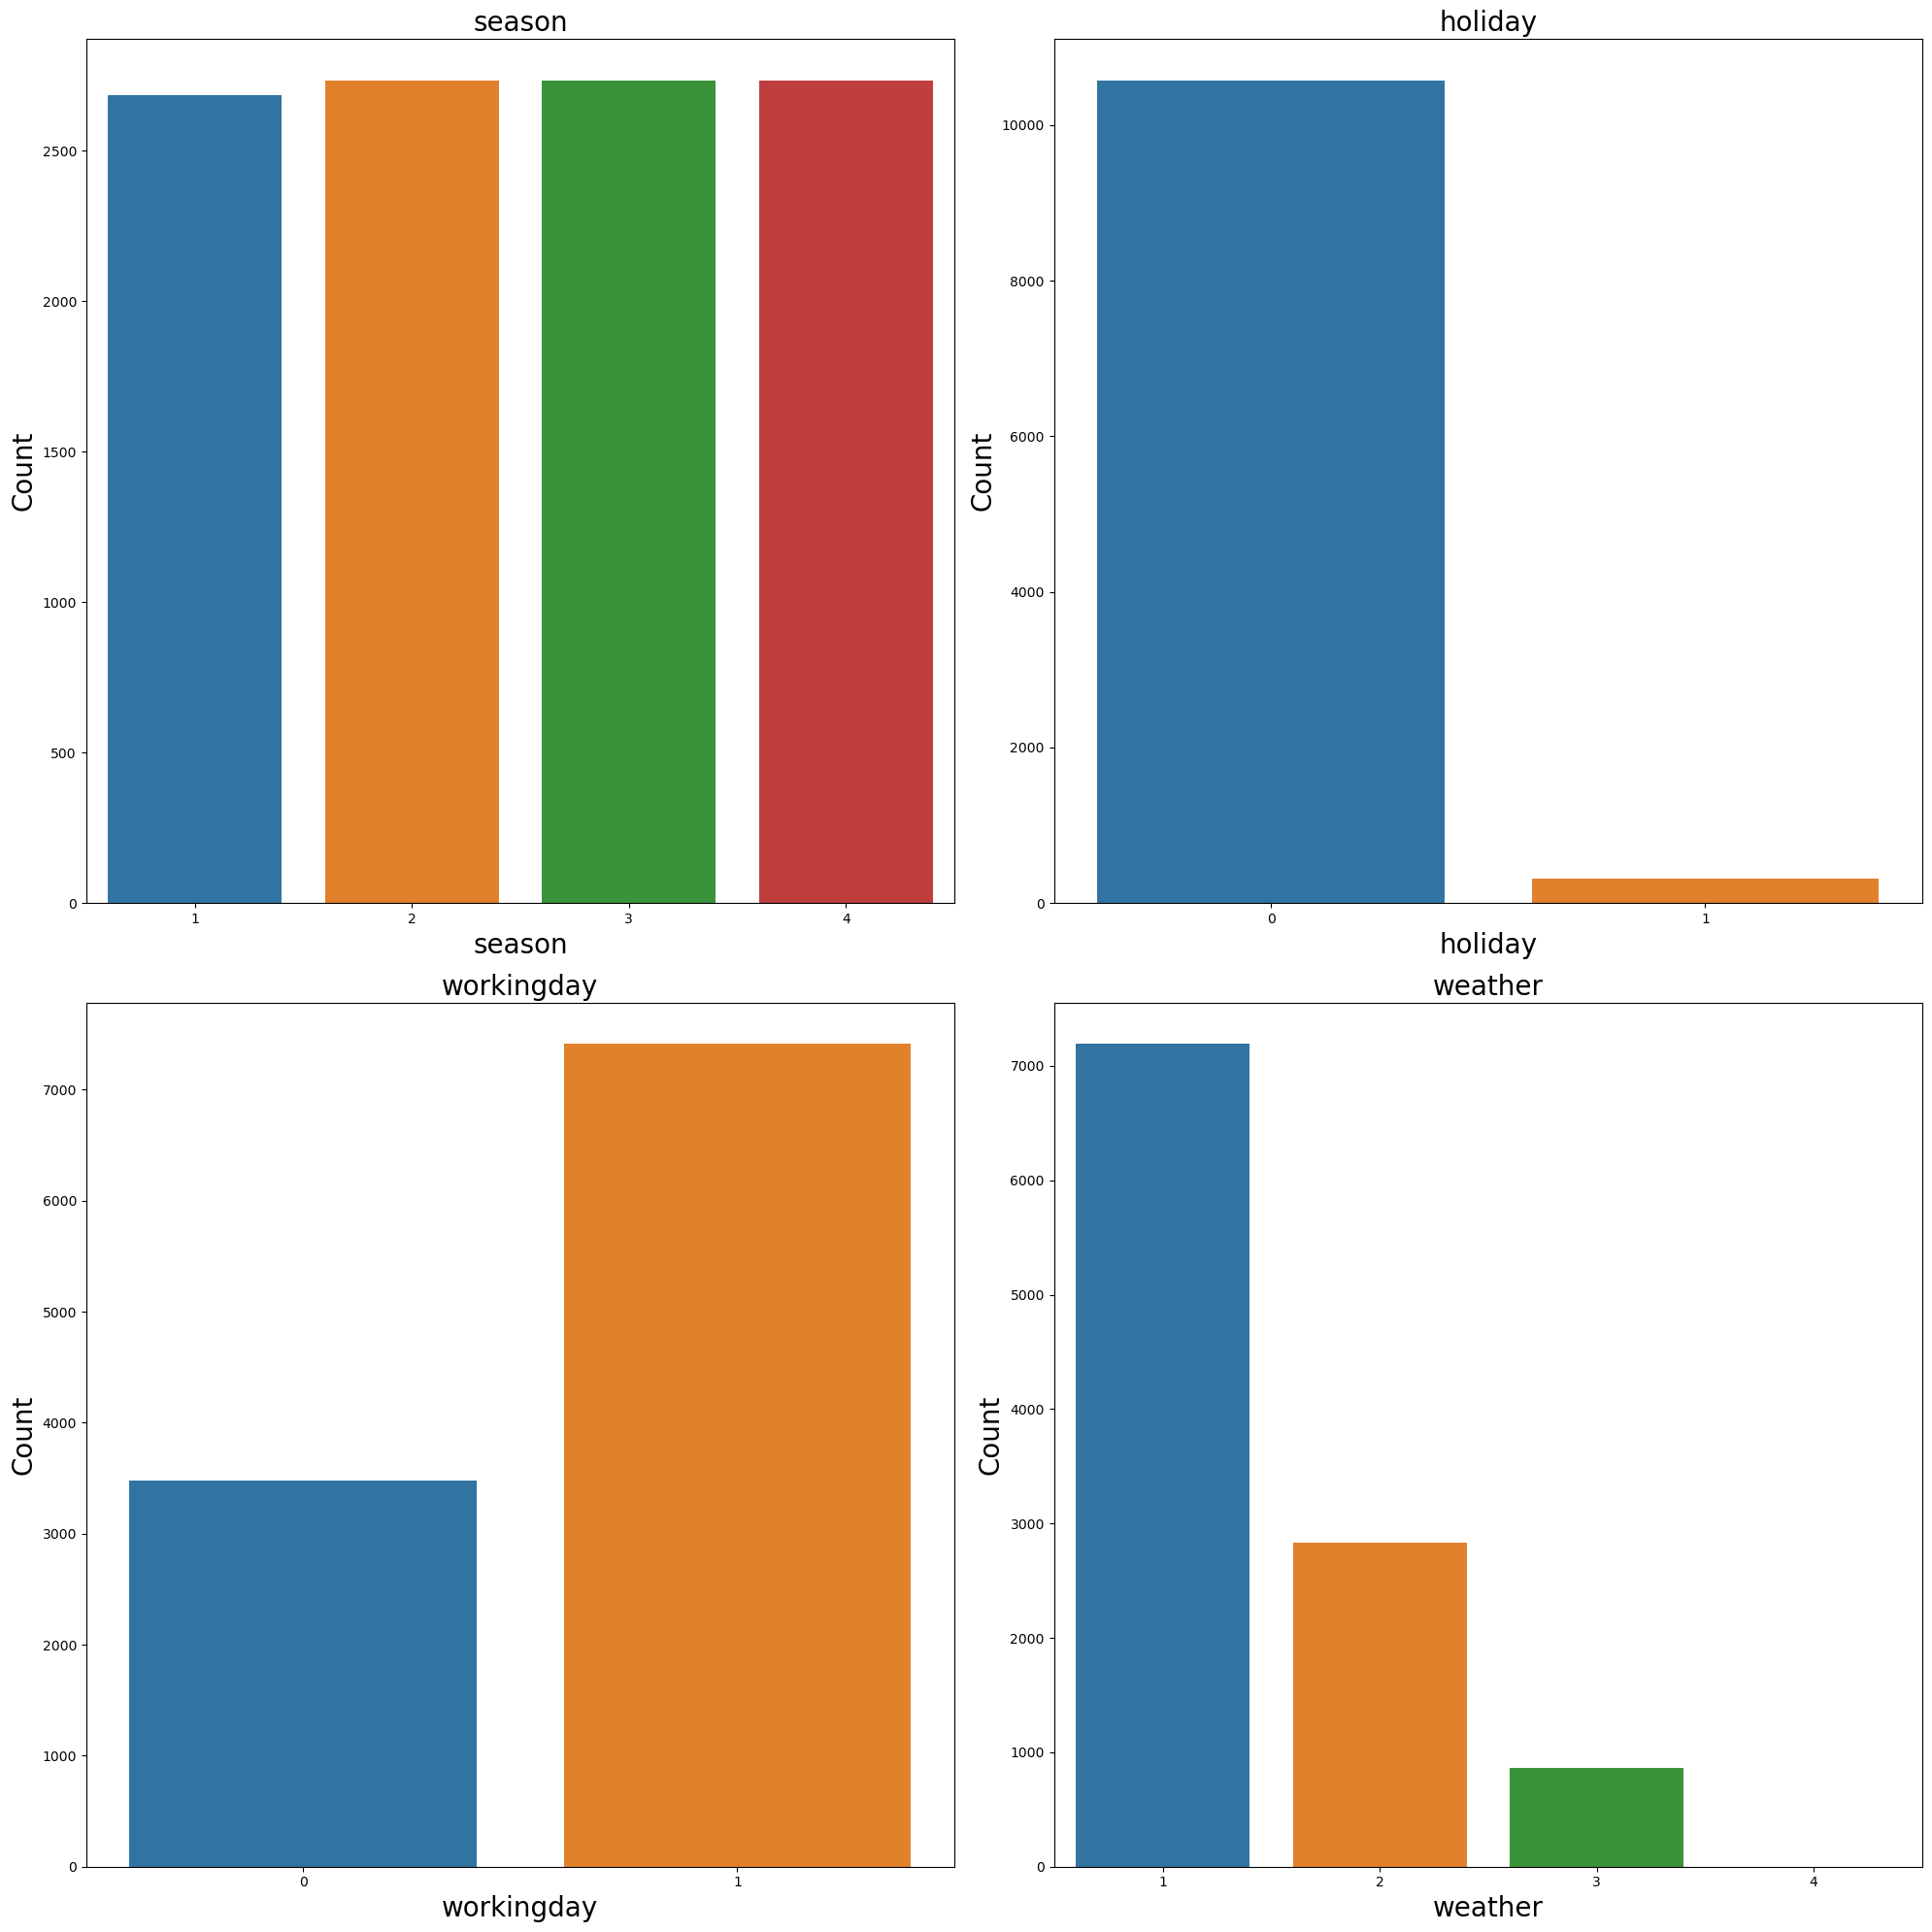

In [136]:
# COUNT PLOT TO CHECK THE DISTRIBUTION
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
for i,col_names in enumerate(obj_cols):
    row=i//2
    col=i%2
    try:
        ax=axes[row][col]
        sns.countplot(data=df,x=col_names,ax=ax)
        ax.set_title(col_names,fontsize=20)
        ax.set_xlabel(col_names,fontsize=20)
        ax.set_ylabel('Count',fontsize=20)
    except:
        continue

plt.tight_layout()
plt.show()

* Usage of rental bikes are at equal levels in all the seasons ( spring / summer / fall / winter )
* Rental bikes are highly used in working days followed by weekends and holidays. Working professionals or school children might be using this for commutation because of heavy traffics. It could also be because the users might be staying near the offices / schools or other destinations near to their place of stay due to which they prefer rental bikes for short distance travels
* Usage of rental bikes are high on a clear or partly cloudy day making it easy for commutation followed by misty weather, light snowy / light rain weather and is least used during heavy rain & thunderstorm which is obvious

## BIVARIATE ANALYSIS

### MONTH-YEAR VS USAGE OF RENTAL BIKES

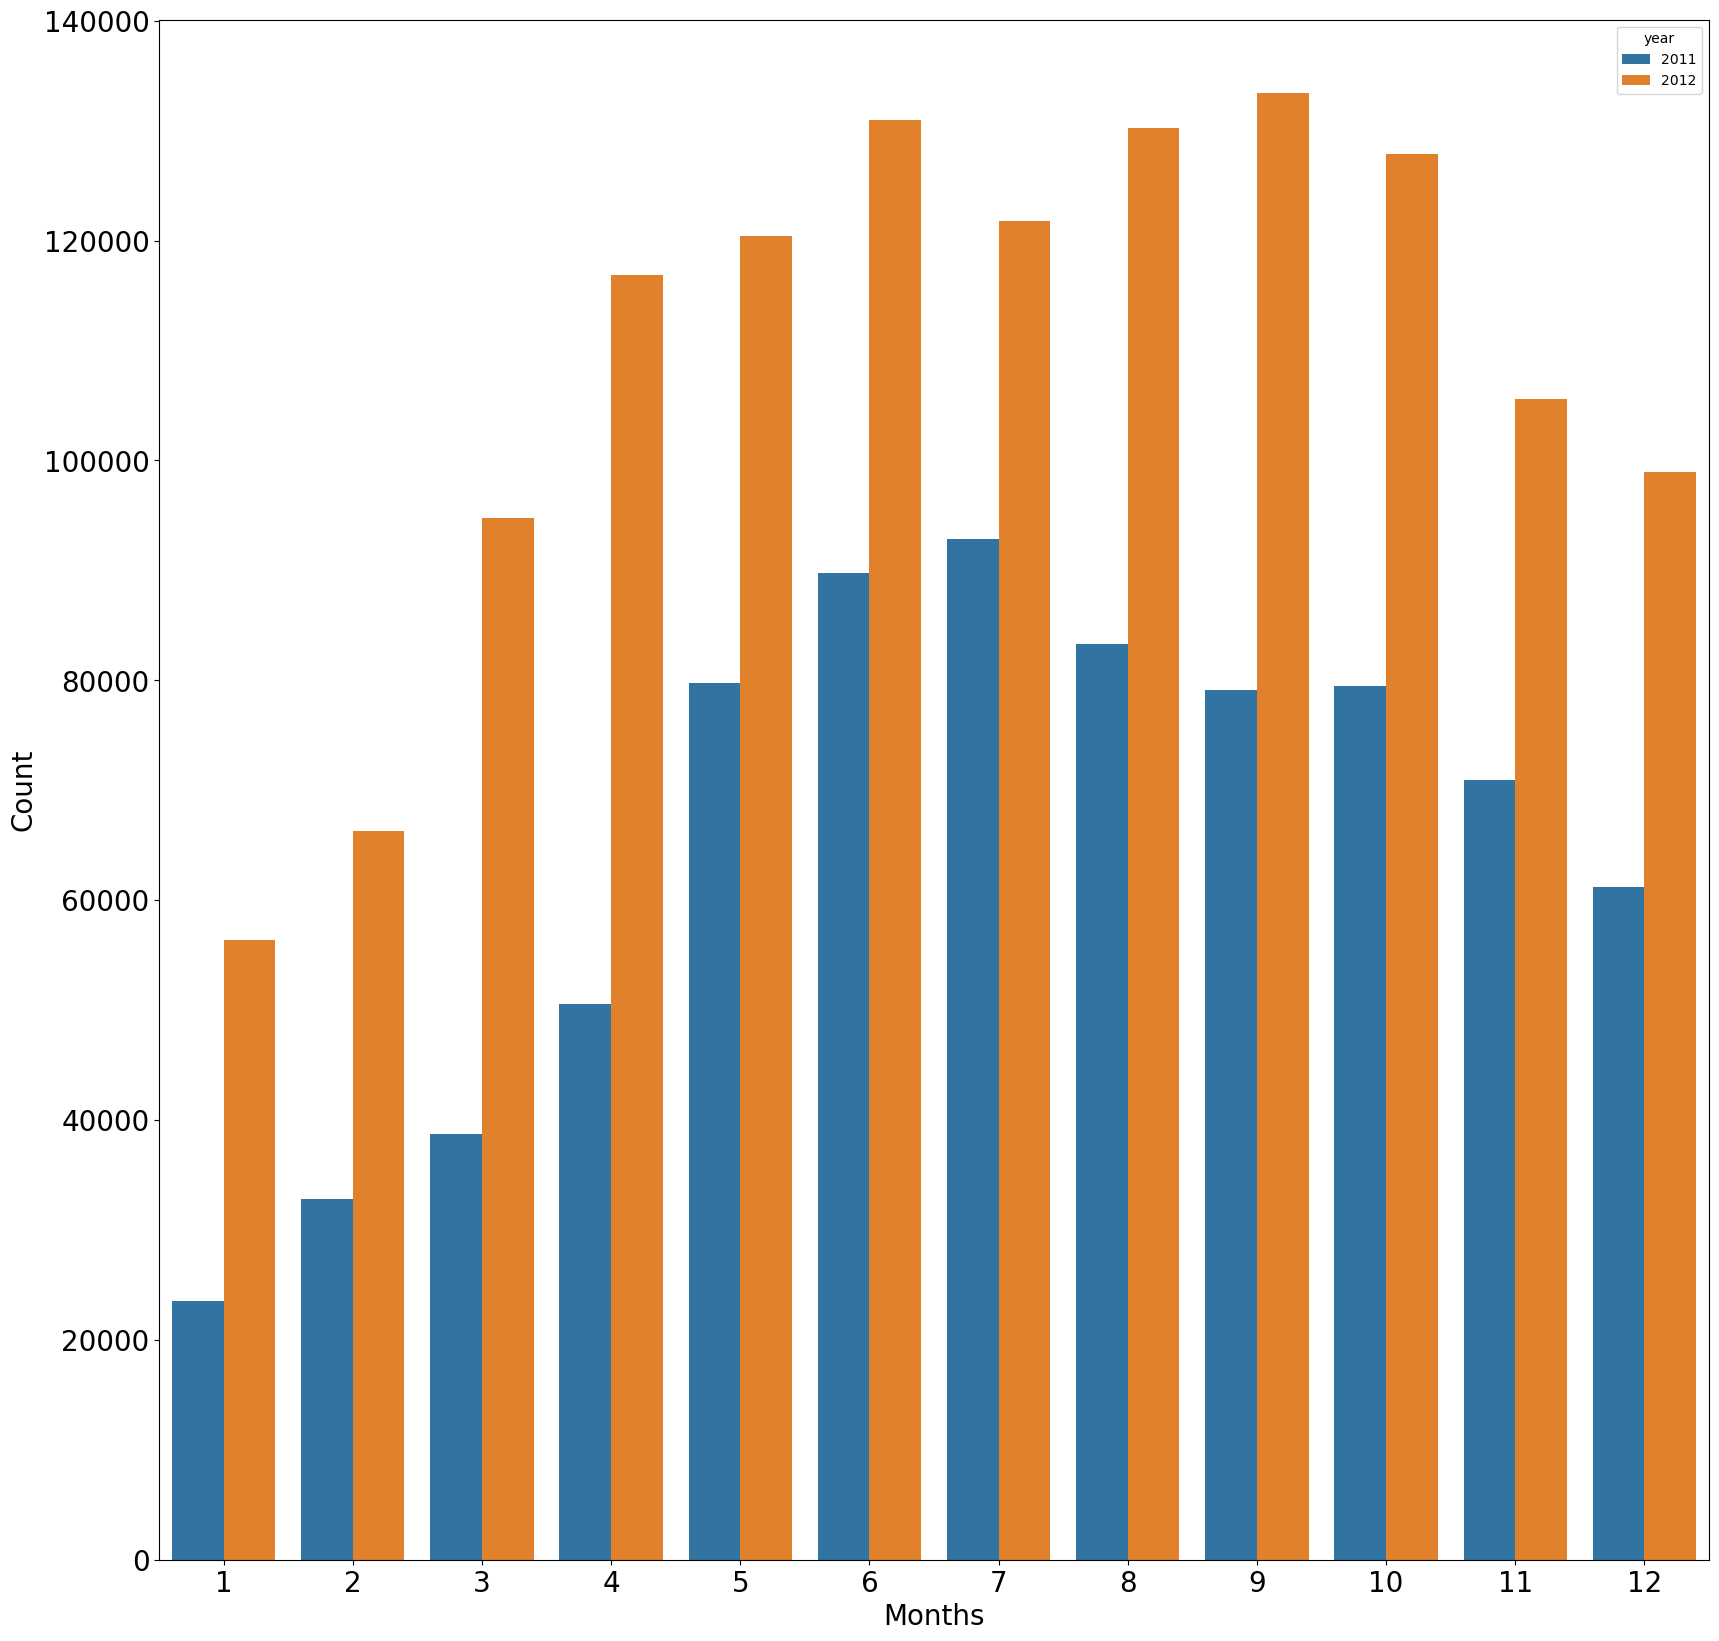

In [140]:
df2=df.groupby(['year','month'])['count'].sum().reset_index()
fig=plt.figure(figsize=(20,20))
sns.barplot(data=df2,x='month',y='count',hue='year')
plt.xlabel('Months',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [109]:
df2.groupby('year')['count'].mean()

year
2011     65164.916667
2012    108624.750000
Name: count, dtype: float64

* Usage of bikes increased by 66% from 2011 to 2012
* Maximum usage happens in between June & September

### MONTHS VS SEASON

In [78]:
df.groupby('month')['season'].median()

month
1     1.0
2     1.0
3     1.0
4     2.0
5     2.0
6     2.0
7     3.0
8     3.0
9     3.0
10    4.0
11    4.0
12    4.0
Name: season, dtype: float64

* Maximum usage happens in the fall season

### HOURLY USAGE OF RENTAL BIKES

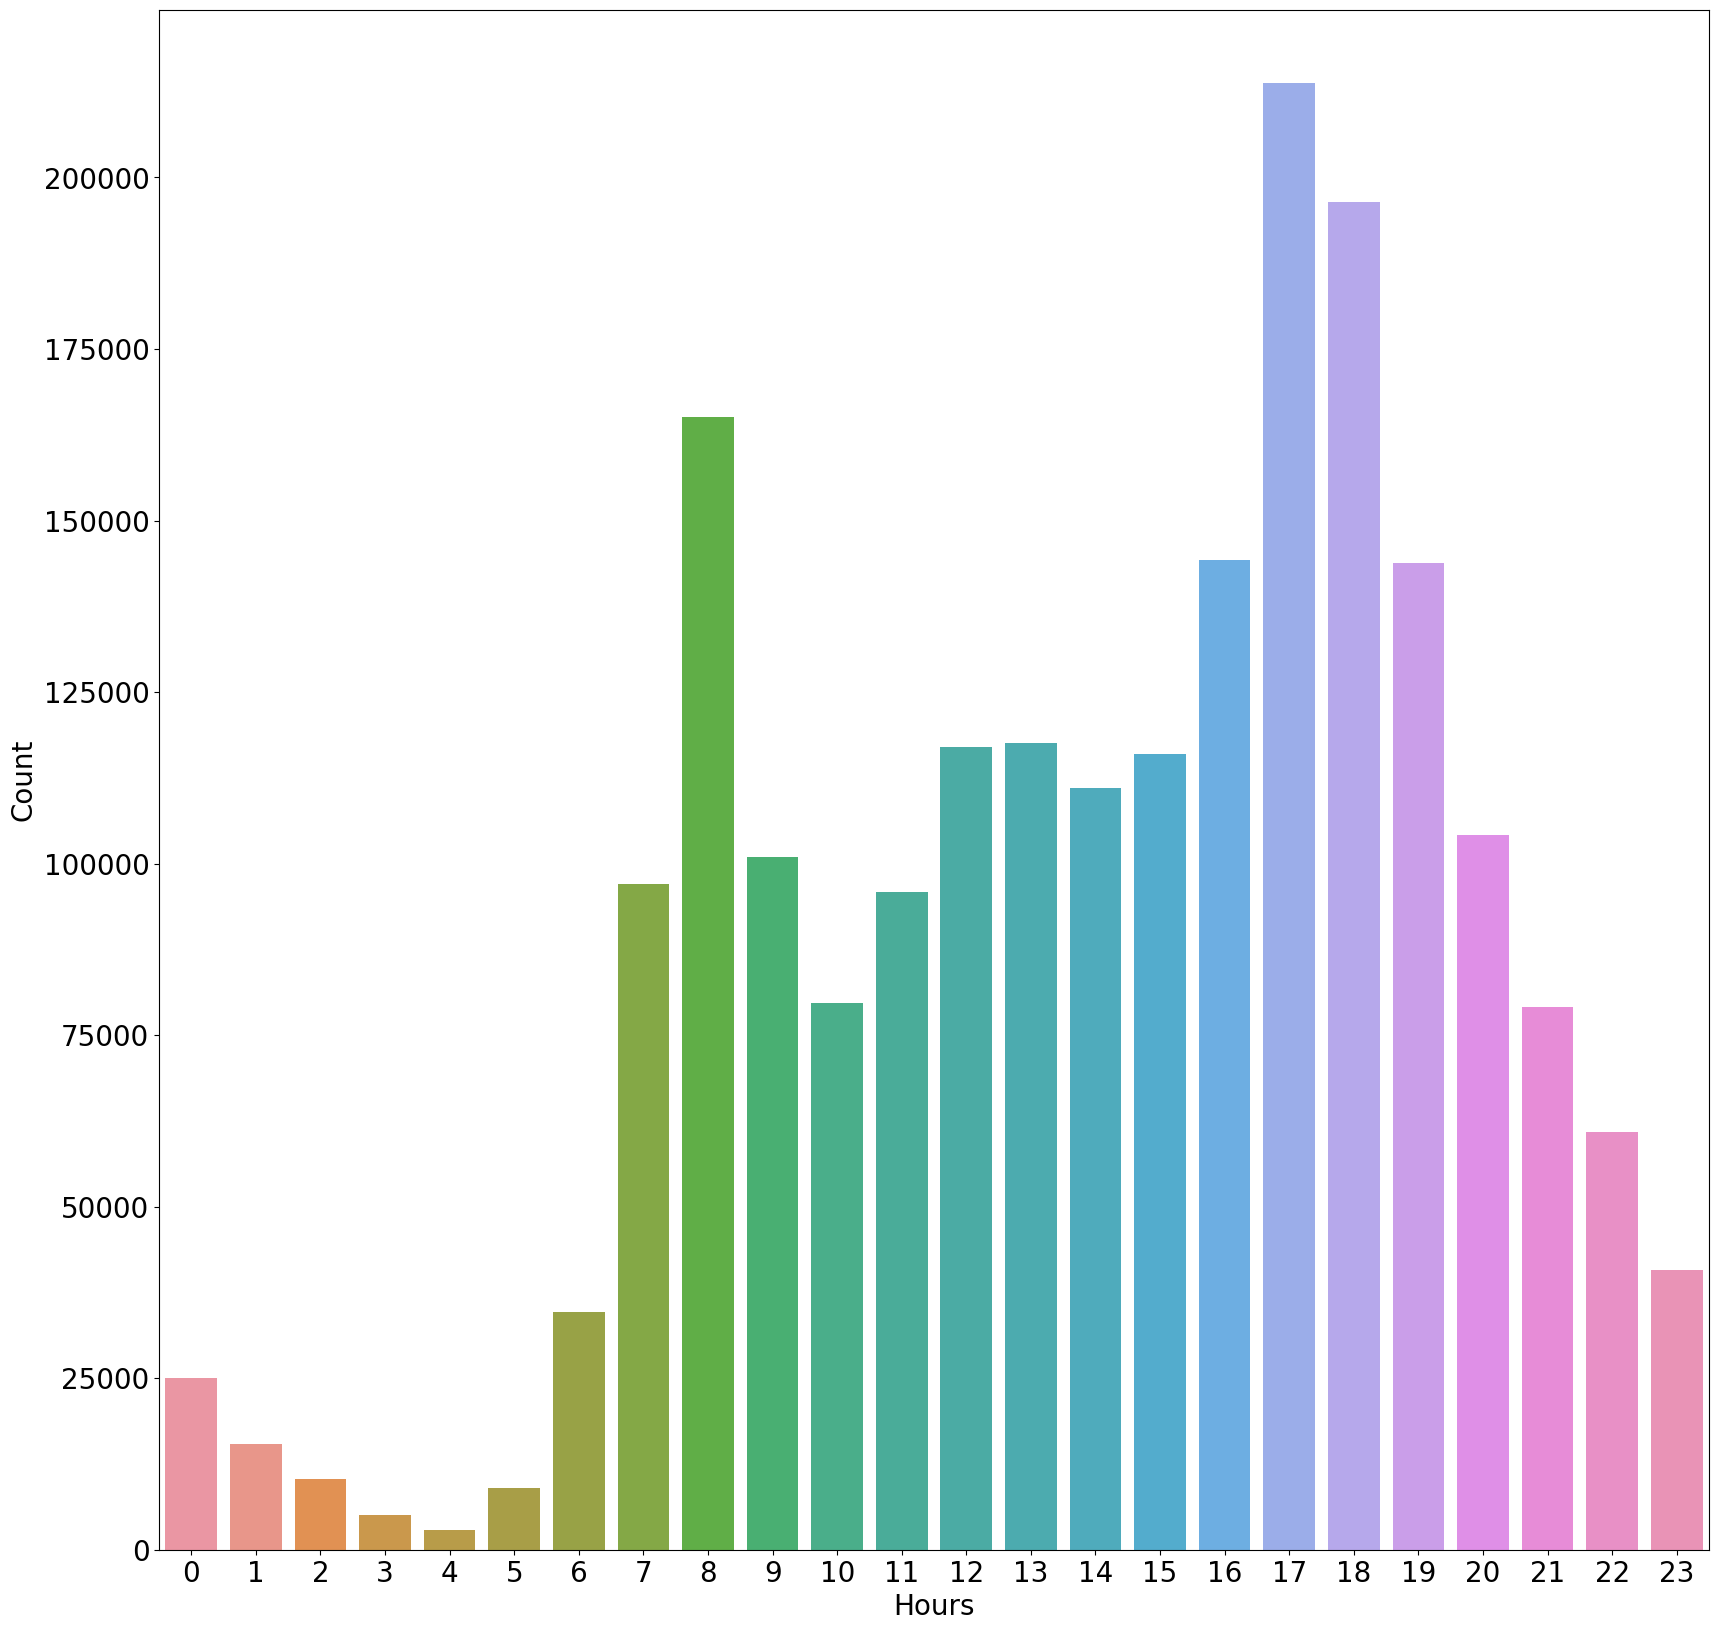

In [141]:
df3=df.groupby(['hours'])['count'].sum().reset_index()
fig=plt.figure(figsize=(20,20))
sns.barplot(data=df3,x='hours',y='count')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* Peak timing is at 8:00am and 5pm
* This is an indication that bikes are mostly used by working professionals / school children 

### TEMPERATURE VS WEATHER & SEASON

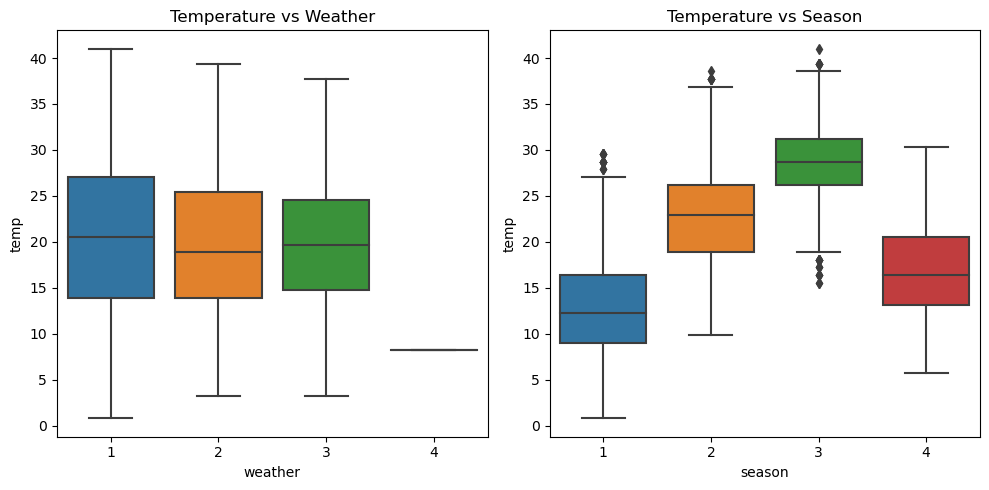

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(data=df,x='weather',y='temp',ax=axes[0])
sns.boxplot(data=df,x='season',y='temp',ax=axes[1])
axes[1].set_title('Temperature vs Season')
axes[0].set_title('Temperature vs Weather')
plt.tight_layout()
plt.show()

* All the weather conditions are having similar temperatures
* Temperature increases in the order of Spring < Winter < Summer < Fall

### HUMIDITY VS WEATHER & SEASON

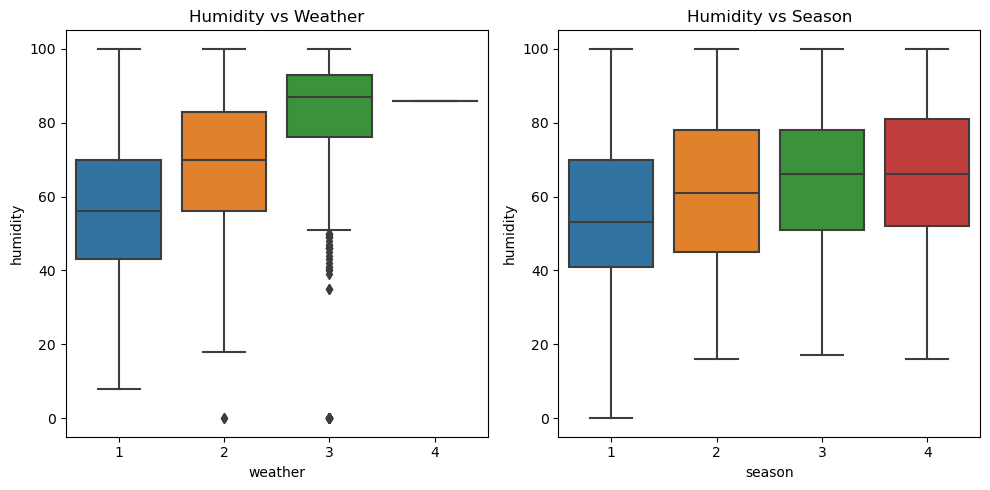

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(data=df,x='weather',y='humidity',ax=axes[0])
sns.boxplot(data=df,x='season',y='humidity',ax=axes[1])
axes[1].set_title('Humidity vs Season')
axes[0].set_title('Humidity vs Weather')
plt.tight_layout()
plt.show()

* Humidity is the highest during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  and the lowest when there is clear sky
* Humidity increases in the order of Spring < Summer < Fall ~ Winter

### WINDSPEED VS WEATHER & SEASON

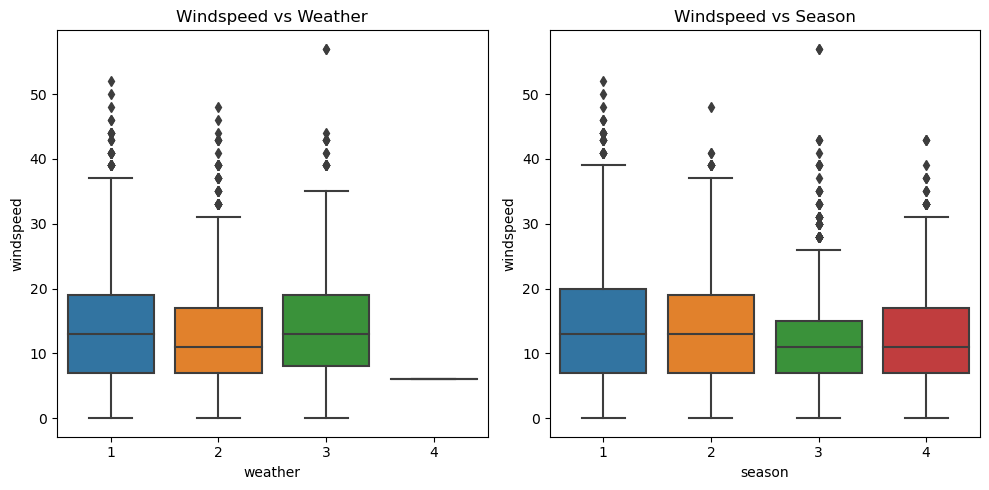

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(data=df,x='weather',y='windspeed',ax=axes[0])
sns.boxplot(data=df,x='season',y='windspeed',ax=axes[1])
axes[1].set_title('Windspeed vs Season')
axes[0].set_title('Windspeed vs Weather')
plt.tight_layout()
plt.show()

* Windspeed is almost at similar levels across all season and weather

### PAIRPLOT OF ALL THE COLUMNS

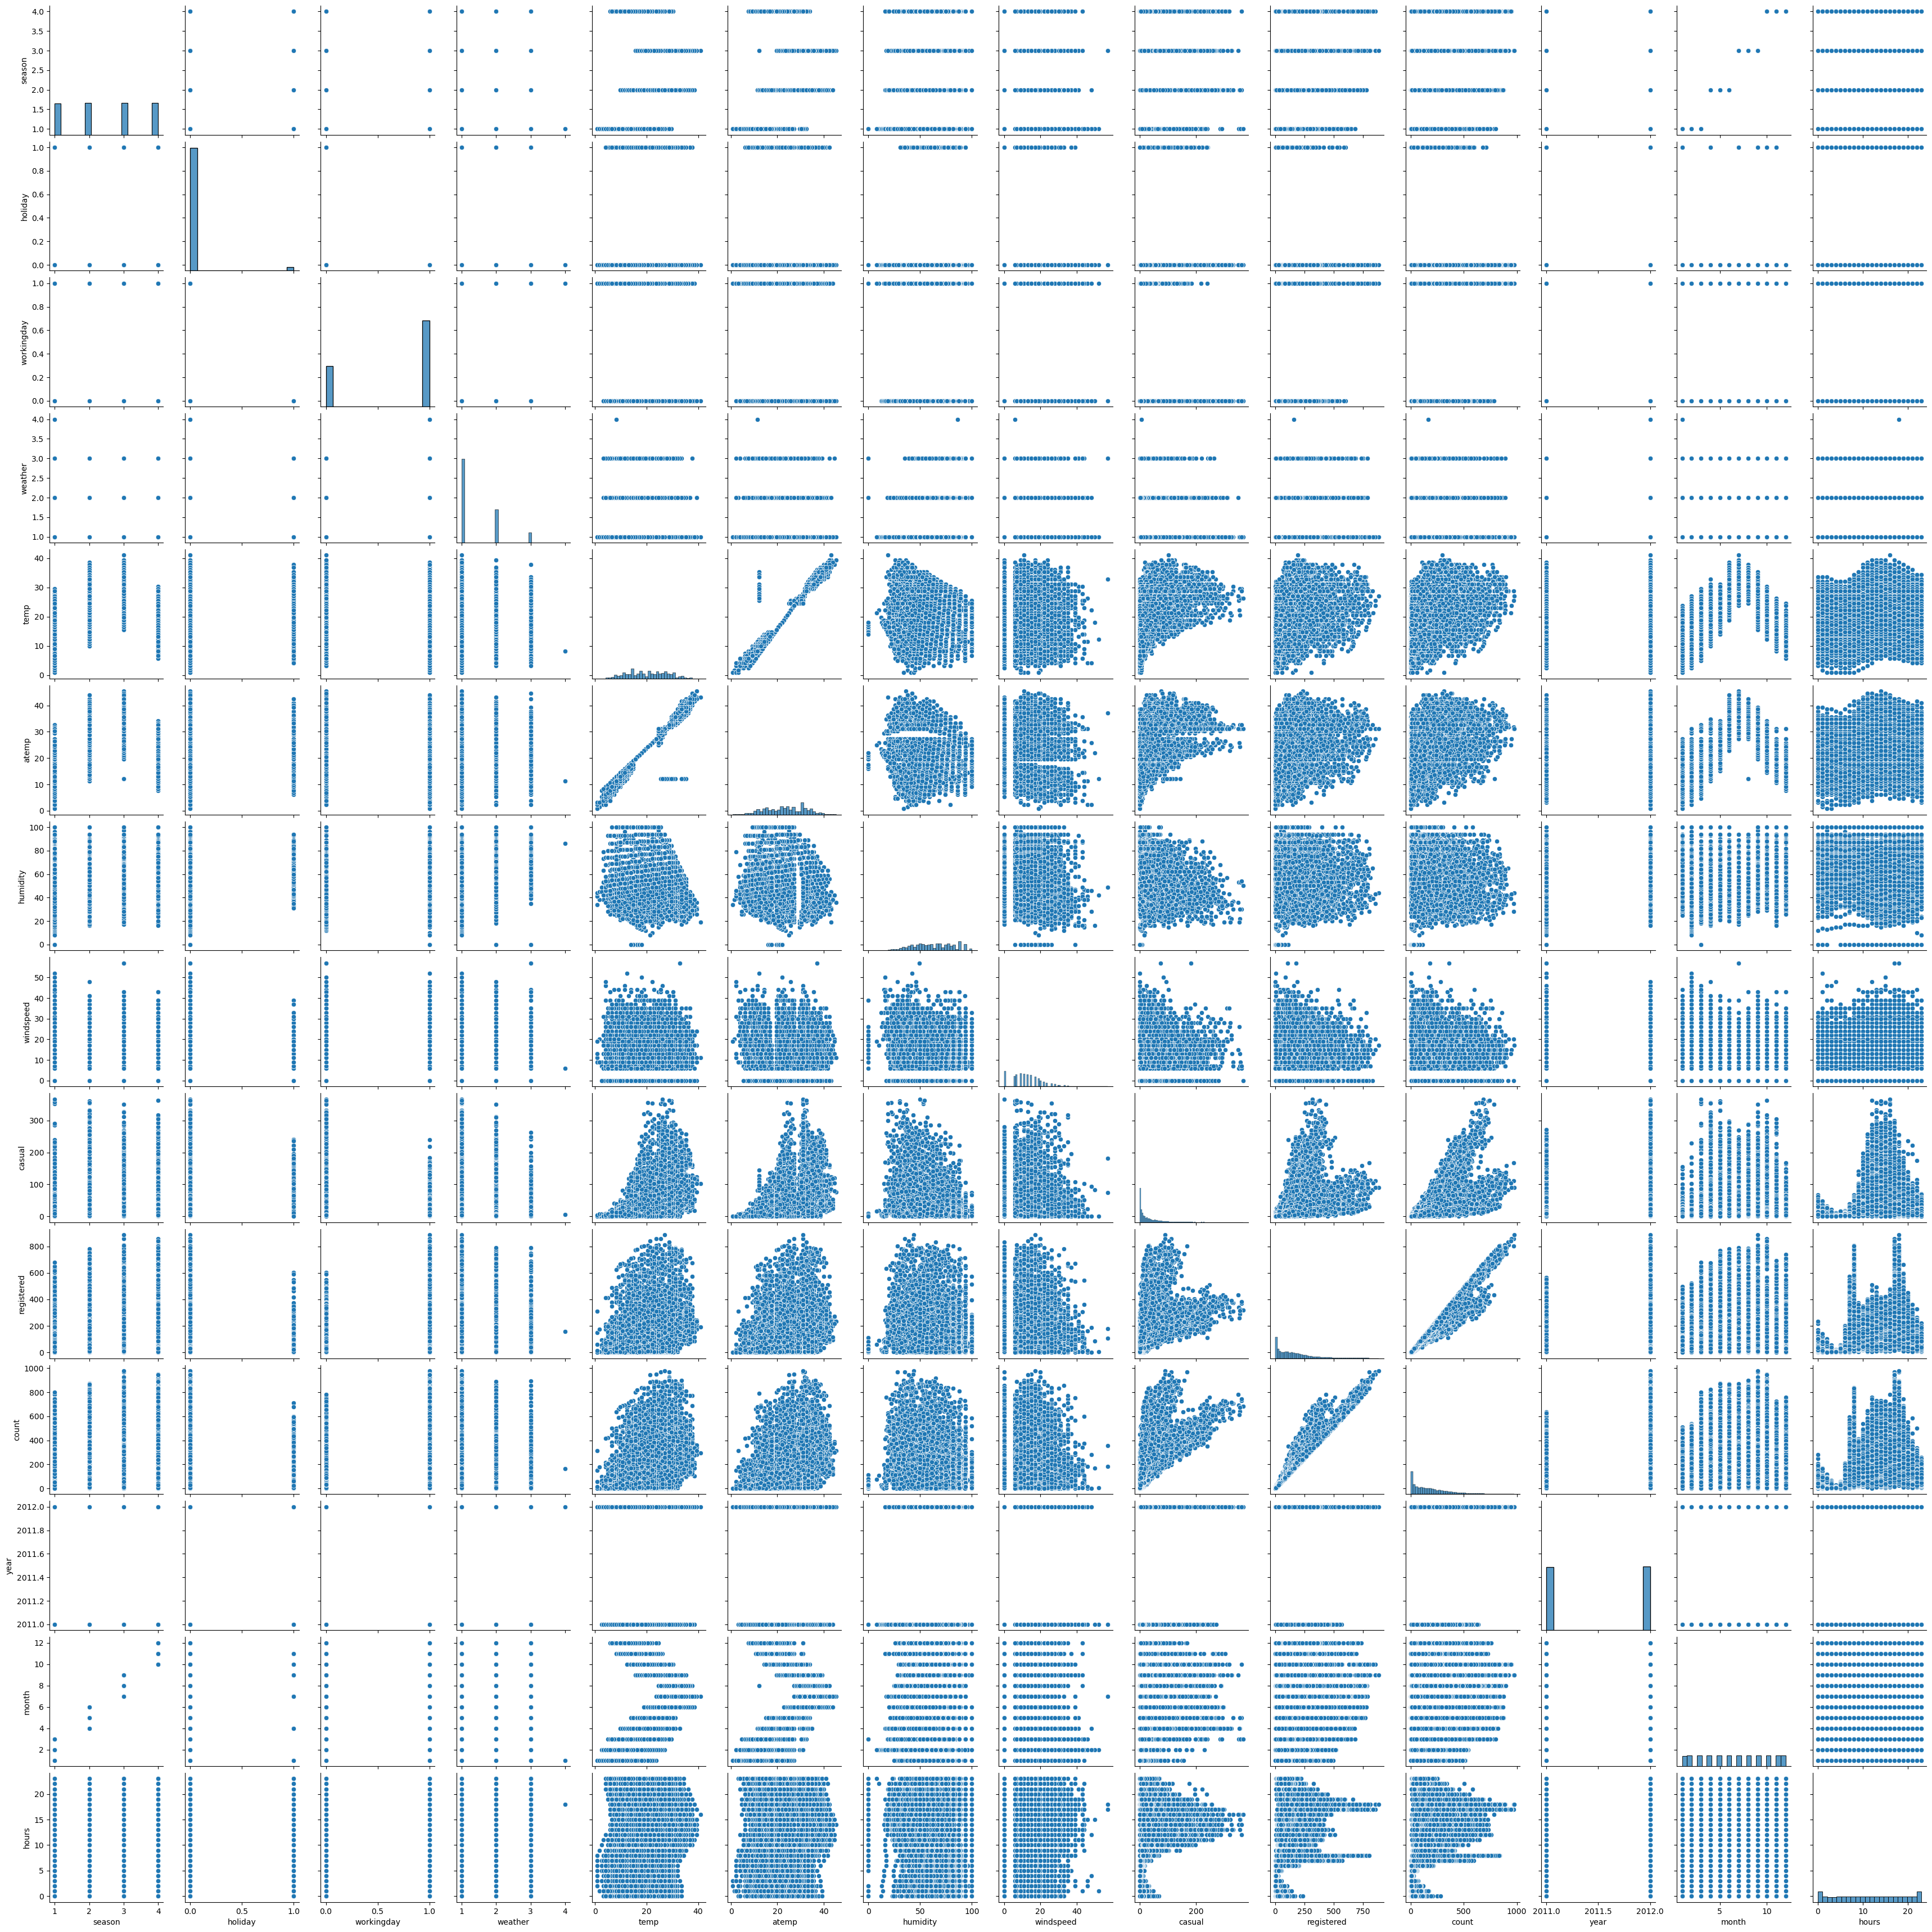

In [143]:
sns.pairplot(df)

### HEATMAP OF ALL THE NUMERICAL COLUMNS

<AxesSubplot:>

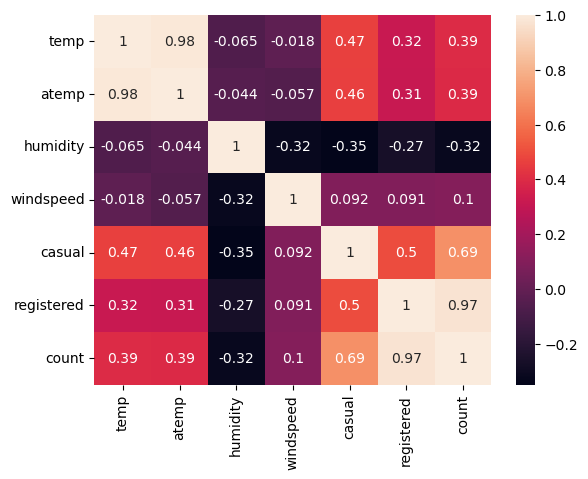

In [23]:
# PEARSON CORRELATION ( DEFAULT )
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

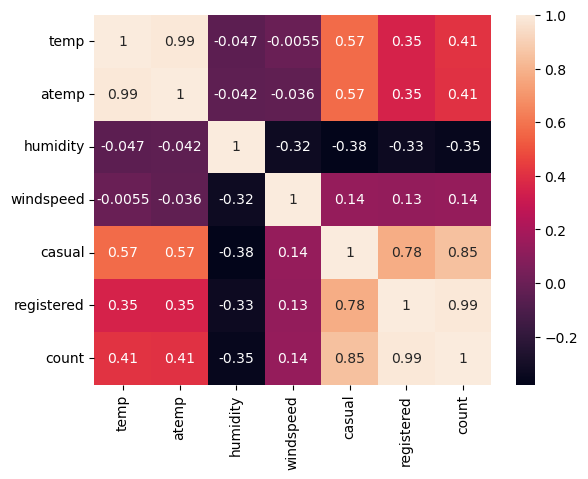

In [24]:
# SPEARMAN CORRELATION 
sns.heatmap(df.corr(method='spearman'),annot=True)

* From the bivariate analysis it is understood that temp, atemp & humidity are more correlated to the number of users of rental bikes
* The statement can be proves based on statistical analysis

# STATISTICAL ANALYSIS

## NUMERICAL vs NUMERICAL  ---> CORRELATION TEST - SPEARMAN & PEARSON

**Null Hypothesis ( Ho )** : The features are not correlated  
**Alternate Hypothesis ( Ha )** : The features are correlated
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> features are correlated  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> features are not correlated

In [25]:
p=[]
col=[]
remark=[]
corr_coeff=[]
for i in num_cols:
    corr,p_val=pearsonr(df[i],df['count'])
    p.append(p_val)
    col.append(i)
    corr_coeff.append(corr)
    if p_val < 0.05:
        remark.append(f'{i} is correlated to count of users')
    else:
        remark.append(f'{i} is not correlated to count of users')
pd.DataFrame({'columns':col,'correlation_coefficient':corr_coeff,'p_value':p,'remarks':remark})

columns  correlation_coefficient        p_value  \
0        temp                 0.394454   0.000000e+00   
1       atemp                 0.389784   0.000000e+00   
2    humidity                -0.317371  2.921542e-253   
3   windspeed                 0.101369   2.898407e-26   
4      casual                 0.690414   0.000000e+00   
5  registered                 0.970948   0.000000e+00   
6       count                 1.000000   0.000000e+00   

                                      remarks  
0        temp is correlated to count of users  
1       atemp is correlated to count of users  
2    humidity is correlated to count of users  
3   windspeed is correlated to count of users  
4      casual is correlated to count of users  
5  registered is correlated to count of users  
6       count is correlated to count of users

In [26]:
p=[]
col=[]
remark=[]
corr_coeff=[]
for i in num_cols:
    corr,p_val=spearmanr(df[i],df['count'])
    p.append(p_val)
    col.append(i)
    corr_coeff.append(corr)
    if p_val < 0.05:
        remark.append(f'{i} is correlated to count of users')
    else:
        remark.append(f'{i} is not correlated to count of users')
pd.DataFrame({'columns':col,'correlation_coefficient':corr_coeff,'p_value':p,'remarks':remark})

columns  correlation_coefficient       p_value  \
0        temp                 0.407989  0.000000e+00   
1       atemp                 0.406562  0.000000e+00   
2    humidity                -0.354049  0.000000e+00   
3   windspeed                 0.135777  5.901522e-46   
4      casual                 0.847378  0.000000e+00   
5  registered                 0.988901  0.000000e+00   
6       count                 1.000000  0.000000e+00   

                                      remarks  
0        temp is correlated to count of users  
1       atemp is correlated to count of users  
2    humidity is correlated to count of users  
3   windspeed is correlated to count of users  
4      casual is correlated to count of users  
5  registered is correlated to count of users  
6       count is correlated to count of users

* Spearman and pearson correlation test shows that temp, atemp, humidity & windspeed are correlated to the number of users using the rental bikes
* More statistical analysis to be done to confirm the influence of independant features on the dependant variable ' count '

## CATEGORICAL vs NUMERICAL ---> T TEST OR ANOVA

### RELATION BETWEEN SEASON & NUMBER OF USERS OF RENTAL BIKES

In [27]:
df['season'].unique()

array([1, 2, 3, 4], dtype=object)

* There are 4 unique values for season and so the statistical test to be used is ANOVA

**ASSUMPTIONS OF ANOVA**
1. The dataset should follow **gaussian distribution** --> To be confirmed using q-q plot & shapiro test
2. Datas are **independant** of each other
3. All the groups should have **equal variance** --> to be tested based on levene test

If the assumptions are not met then **Kruskal wallis test** to be used to check statistical significance

**TEST FOR NORMALITY**

<AxesSubplot:xlabel='count', ylabel='Count'>

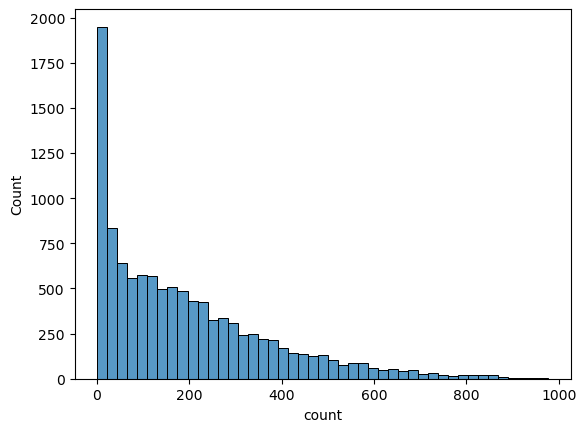

In [28]:
sns.histplot(data=df,x='count')

* Clearly the distribution is not normal
* This can be confirmed using Q-Q plot and Shapiro test

**Q-Q plot**

In [29]:
import statsmodels.api as sm

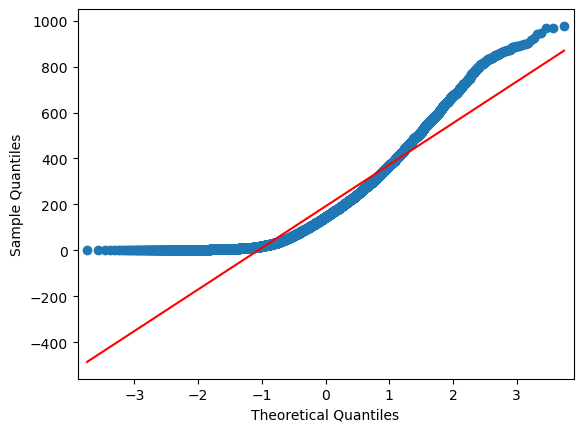

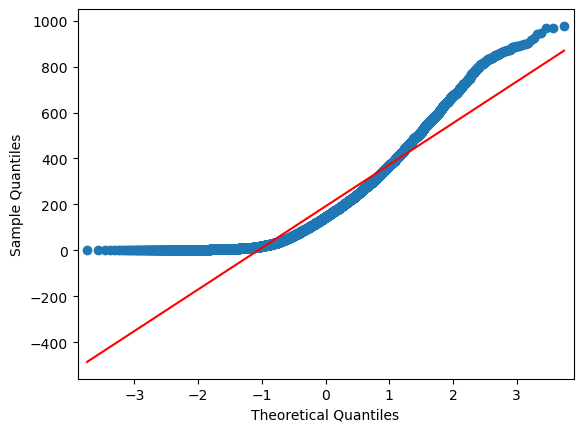

In [30]:
sm.qqplot(df['count'],line='s')

* Q-Q plot shows that the distribution is not gaussian
* The same to be confirmed with shapiro

**SHAPIRO TEST**

**Null Hypothesis ( Ho )** : The distribution is gaussian  
**Alternate Hypothesis ( Ha )** : The distribution is not gaussian    
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> The distribution is not gaussian      
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> The distribution is gaussian    

In [31]:
shapiro(df['count'])

C:\Users\gokul\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)

* Hist plot, Q-Q plot & Shapiro test shows that the distribution is not normal
* Therefore the dataset is not meeting the first assumption for using ANOVA

**TEST FOR EQUAL VARIANCE**

**LEVENE TEST**

**Null Hypothesis ( Ho )** : The variances are equal  
**Alternate Hypothesis ( Ha )** : The variances are not equal   
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> The variances are not equal  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> The variances are equal  

In [32]:
from scipy.stats import levene

In [33]:
# The groups for ANOVA test
season_1=df[df['season']==1]['count'] # Count column corresponding to season 1 
season_2=df[df['season']==2]['count'] # Count column corresponding to season 2
season_3=df[df['season']==3]['count'] # Count column corresponding to season 3
season_4=df[df['season']==4]['count'] # Count column corresponding to season 4

In [34]:
levene(season_1,season_2,season_3,season_4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

* Levene test proves that the variances are not equal. 
* None of the assumptions are meeting and hence Kruskal Wallis test will be used

**Null Hypothesis ( Ho )** : The features are independant  
**Alternate Hypothesis ( Ha )** : The features are dependant  
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> features are dependant  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> features are independant

In [35]:
kruskal(season_1,season_2,season_3,season_4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [36]:
# ANOVA test as a confirmation for kruskal wallis test
f_oneway(season_1,season_2,season_3,season_4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [37]:
print('spring ----> ', season_1.mean())
print('summer ----> ', season_2.mean())
print('fall ----> ', season_3.mean())
print('winter ----> ', season_4.mean())

spring ---->  116.34326135517499
summer ---->  215.25137211855105
fall ---->  234.417124039517
winter ---->  198.98829553767374


* Season is a dependant feature for number of users of rental bikes since p_value is very low  as per both kruskal wallis & ANOVA test
* Mostly used during falls followed by summer season

### RELATION BETWEEN HOLIDAY & NUMBER OF USERS OF RENTAL BIKES

In [38]:
df['holiday'].unique()

array([0, 1], dtype=object)

* There are 2 unique values for holiday and so the statistical test to be used is ttest

**Null Hypothesis ( Ho )** : There is no statistically significant difference  
**Alternate Hypothesis ( Ha )** : There is statistically significant difference   
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> There is statistically significant difference  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> There is no statistically significant difference   

In [39]:
# The groups for t test
holiday_0=df[df['holiday']==0]['count'] # Count column corresponding to not a holiday ( holiday = 0 )
holiday_1=df[df['holiday']==1]['count'] # Count column corresponding to a holiday ( holiday = 1 )

In [40]:
ttest_ind(holiday_0,holiday_1)

Ttest_indResult(statistic=0.5626388963477119, pvalue=0.5736923883271103)

* holiday is an inddependant feature for number of users of rental bikes since p_value is higher than significance level

### RELATION BETWEEN WORKINGDAY & NUMBER OF USERS OF RENTAL BIKES

In [41]:
df['workingday'].unique()

array([0, 1], dtype=object)

* There are 2 unique values for holiday and so the statistical test to be used is ttest

**Null Hypothesis ( Ho )** : There is no statistically significant difference  
**Alternate Hypothesis ( Ha )** : There is statistically significant difference   
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> There is statistically significant difference  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> There is no statistically significant difference   

In [42]:
# The groups for t test
workingday_0=df[df['workingday']==0]['count'] # Count column corresponding to not a workingday ( workingday = 0 ) - holiday ? weekend
workingday_1=df[df['workingday']==1]['count'] # Count column corresponding to a workingday ( workingday = 1 )

In [43]:
ttest_ind(workingday_0,workingday_1)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

* workingday is an independant feature for number of users of rental bikes since p_value is higher than significance level

### RELATION BETWEEN WEATHER & NUMBER OF USERS OF RENTAL BIKES

In [44]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

* There are 4 unique values for season and so the statistical test to be used is ANOVA
* Since the count column doesnt meet the assumptions of ANOVA, kruskal wallis test is used to check the statistical significance

In [45]:
# The groups for Kruskal Wallis test
weather_1=df[df['weather']==1]['count'] # Count column corresponding to weather 1 
weather_2=df[df['weather']==2]['count'] # Count column corresponding to weather 2
weather_3=df[df['weather']==3]['count'] # Count column corresponding to weather 3
weather_4=df[df['weather']==4]['count'] # Count column corresponding to weather 4

**Null Hypothesis ( Ho )** : The features are independant  
**Alternate Hypothesis ( Ha )** : The features are dependant  
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> features are dependant  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> features are independant

In [46]:
kruskal(weather_1,weather_2,weather_3,weather_4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [47]:
# ANOVA test as a confirmation for kruskal wallis test
f_oneway(weather_1,weather_2,weather_3,weather_4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [48]:
print('Clear weather ----> ', weather_1.mean())
print('Cloudy & Misty ----> ', weather_2.mean())
print('Light snow & rain ----> ', weather_3.mean())
print('Heavy rain & thunderstorm ----> ', weather_4.mean())

Clear weather ---->  205.23679087875416
Cloudy & Misty ---->  178.95553987297106
Light snow & rain ---->  118.84633294528521
Heavy rain & thunderstorm ---->  164.0


* Weather is a dependant feature for number of users of rental bikes since p_value is very low as per both kruskal wallis & ANOVA test
* Mostly used during clear weather followed by cloudy & misty and it is least used during light snow & rain


## CATEGORICAL vs CATEGORICAL ---> CHI SQUARE TEST

### RELATION BETWEEN WEATHER & SEASON

**ASSUMPTIONS OF CHI SQUARE TEST**
1. Datas should be **categorical**
2. Datas should be **independant & mutually exclusive**
3. Each cell should have **more than 5 elements**


In [148]:
cross_tab=pd.crosstab(index=df['season'],columns=df['weather'])
cross_tab

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

* Column index 4 to be deleted because the number of elements is less than 5 violating 3rd assumption

In [149]:
cross_tab.drop(4,axis=1,inplace=True)
cross_tab

weather     1    2    3
season                 
1        1759  715  211
2        1801  708  224
3        1930  604  199
4        1702  807  225

**Null Hypothesis ( Ho )** : The features are independant  
**Alternate Hypothesis ( Ha )** : The features are dependant  
**Significance level** = 5%  
**Confidence level** = 95%  
If p_value is **less than** significance level ==> reject null hypothesis ==> features are dependant  
If p_value is **greater than** significance level ==> cannot reject null hypothesis ==> features are independant

In [150]:
chi2_contingency(cross_tab)

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

* Weather and Season are dependant because the p_value=2.82 e-8 is less than the significance level

# INSIGHTS

* Important parameters for predicting demand - **Season, Weather, ambient temperature & humidity**
* 2085476 users used rental bikes in the period of 2011-2012
* 81% of the users are registered and 18% are casual users
* 50% increase in casual users and 70% increase in registered users are noticed from 2011 to 2012
* Rental bikes are highly used in working days followed by weekends and holidays.
* Peak timing is at 8:00am in the morning and 5pm in the evening
* Maximum usage of rental bikes are during falls followed by summer and least used during spring
* Rental bikes are mostly used during clear weather and least used during light rain
* Usage of bikes are positively correlated with temperature and negatively correlated with humidity
* Temperature increases in the order of Spring < Winter < Summer < Fall
* Humidity increases in the order of Spring < Summer < Fall ~ Winter
* Season is a dependant feature for number of users of rental bikes . Mostly used during falls followed by summer season
* Weather is a dependant feature for number of users of rental bikes. Mostly used during clear weather followed by cloudy & misty and it is least used during light snow & rain
* Usage of bikes increased by 66% from 2011 to 2012
* Maximum usage happens in between June & September


# RECOMMENDATIONS

* Since the usage is highest on working days, it can be inferred that majority of the users are working professionals / school going children etc. YULU can collaborate with companies or schools to provide EV rental bike services at lesser amount which will increase the user count
* Usage is very less on weekends & holidays. So YULU can reduce the fare on these days to attract more users
* Usage is high on fall season when temperature is the highest in a year.. The bikes should be designed to work in those temperature ( max-40 degrees ) and humidity conditions especially since its an Electic Vehicle where cooling of important components such as battery, motor etc. becomes critical
* Spare parts availability to be ensured in all the service centres between June to September due to heavy usage and high ambient temperature
* At the same time, bike availability also to be ensured during the period to meet the user requirements without creating any delays for the customers
* Registered users accounts to 81% of the total users. YULU can provide special subscription features for the registered customers like rewards for a fixed km ride / contests especially during weekends which will increase the registered users further and also increase user engagement in weekends & holidays
* Usage is very low on rainy days. YULU can explore innovative ideas to make it possible to use the bikes on rainy weathers as well. It can be inbuilt systems or additional attachments. This will largely increase the user base
* Dynamic pricing strategy can be introduced by icnreasing the fare during peak hours and reduce the fare during normal hours